<a href="https://colab.research.google.com/github/avani1998/Airbnb-Data-Analysis/blob/main/Airbnb_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from scipy import stats
from statsmodels.stats import weightstats as stests

In [ ]:
import zipfile
#Unzipping the dataset
zf = zipfile.ZipFile("/content/drive/My Drive/out.zip")

#Creating the dataframe from the dataset
DF = pd.read_csv(zf.open('out.csv'), low_memory= False)
pd.set_option("max_columns", 100)
pd.set_option("max_rows", 100)

In [ ]:
#Printing the first five rows of the dataset
DF.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,...,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20190416181629,2019-04-16,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,This is the best spot in Rio. Everything happe...,NaN,Excellent location. Close to all major public ...,The entire apartment is yours. It is a vacatio...,I will be available throughout your stay shoul...,Please leave the apartment in a clean fashion ...,NaN,NaN,https://a0.muscache.com/im/pictures/65320518/3...,NaN,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, Rio de Janeiro, Brazil",I am a journalist/writer. Lived for 15 years...,within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/67b13cea-8...,https://a0.muscache.com/im/pictures/67b13cea-8...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,NaN,Rio de Janeiro,Rio de Janeiro,22020-050,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.96592,-43.17896,...,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$302.00,NaN,NaN,$0.00,$306.00,2,$58.00,5,30,5,5,30,30,5.0,30.0,today,t,26,41,67,342,2019-04-16,224,20,2010-07-15,2019-04-05,93.0,9.0,10.0,10.0,10.0,10.0,9.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.10
1,25026,https://www.airbnb.com/rooms/25026,20190416181629,2019-04-16,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,"For any stay superior to 15 days, an additiona...",At night we recommend you to take taxis only. ...,"internet wi-fi, cable tv, air cond, ceiling fa...","Only at check in, we like to leave our guests ...",Smoking outside only. Family building so pleas...,NaN,NaN,https://a0.muscache.com/im/pictures/3003965/68...,NaN,102840,https://www.airbnb.com/users/show/102840,Viviane,2010-04-03,"Rio de Janeiro, State of Rio de Janeiro, Brazil","Hi guys, We're a lovely team of 3 people:\r\n\...",within a day,88%,NaN,f,https://a0.muscache.com/im/pictures/9e204f80-1...,https://a0.muscache.com/im/pictures/9e204f80-1...,Copa

#Cleaning The Data
First, we choose the data columns regarded important after going over dataset

In [ ]:
df=DF[['id' ,
 'name' ,
 'amenities',
 'host_location',
 'host_response_time',
 'host_is_superhost',
 'host_listings_count',
 'host_response_rate',
 'host_total_listings_count',
 'host_verifications',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'city',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'price',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'review_scores_rating',
 'requires_license',
 'instant_bookable',
 'cancellation_policy']]

#Dropping rows with Duplicate ID's

In [ ]:
df.drop_duplicates(subset ="id",keep = False, inplace = True)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,name,amenities,host_location,host_response_time,host_is_superhost,host_listings_count,host_response_rate,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood_cleansed,city,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,extra_people,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,requires_license,instant_bookable,cancellation_policy
388,454439,GREAT HOUSE IN AN ISLAND IN RIO !,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...","Rio de Janeiro, Rio de Janeiro, Brazil",within a few hours,f,3.0,88%,3.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,Barra da Tijuca,Rio de Janeiro,BR,Brazil,-23.00096,-43.30893,f,House,Private room,2,1.5,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$74.00,$50.00,1,1125,5,0,93.0,f,f,strict_14_with_grace_period
633,762985,Beautiful Condo at Leblon Beach,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...","Brasilia, Distrito Federal, Brazil",a few days or more,f,1.0,17%,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,Leblon,Rio de Janeiro,BR,Brazil,-22.98532,-43.22462,t,Apartment,Entire home/apt,6,2.0,2.0,5.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$299.00,$0.00,2,90,21,0,88.0,f,f,moderate
635,764534,Copacabana Beach / Wi-fi-Cable-AC,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...","Rio de Janeiro, Rio de Janeiro, Brazil",NaN,f,2.0,NaN,2.0,"['email', 'phone', 'reviews']",f,Copacabana,Rio de Janeiro,BR,Brazil,-22.96760,-43.18378,f,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$171.00,$30.00,5,26,11,0,94.0,f,f,strict_14_with_grace_period
949,925561,Rentin Room near Arpoador Beach,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...","Rio de Janeiro, Rio de Janeiro, Brazil",within a day,f,4.0,80%,4.0,"['email', 'phone', 'facebook']",f,Ipanema,Rio de Janeiro,BR,Brazil,-22.98355,-43.19550,f,Apartment,Private room,1,1.5,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",$322.00,$0.00,20,30,0,0,NaN,f,t,flexible
1032,978423,Condo Barão 53,{},"Rio de Janeiro, Rio de Janeiro, Brazil",within a few hours,f,22.0,80%,22.0,"['email', 'phone', 'reviews']",f,Copacabana,Rio de Janeiro,BR,Brazil,-22.97564,-43.19054,t,Apartment,Entire home/apt,1,NaN,1.0,1.0,Real Bed,{},$310.00,$0.00,3,30,0,0,NaN,f,f,strict_14_with_grace_period


In [ ]:
df.describe()

,id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating
count,5.403000e+03,5401.000000,5401.000000,5403.000000,5403.000000,5403.000000,5393.000000,5377.000000,5270.000000,5403.000000,5403.000000,5403.000000,5403.000000,1131.000000
mean,3.070160e+07,61.811887,61.811887,-22.964542,-43.247970,3.982787,1.583534,1.495258,2.404934,3.685360,684.390524,1.126967,0.411068,91.833775
std,1.249516e+07,279.020811,279.020811,0.037697,0.097469,2.585860,1.181044,1.268914,2.217097,16.893185,528.490311,4.698793,1.718533,15.250439
min,2.448000e+04,0.000000,0.000000,-23.070930,-43.702700,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,20.000000
25%,2.197172e+07,1.000000,1.000000,-22.984705,-43.303375,2.000000,1.000000,1.000000,1.000000,1.000000,30.000000,0.000000,0.000000,90.000000
50%,3.387645e+07,2.000000,2.000000,-22.970690,-43.195211,4.000000,1.000000,1.000000,2.000000,2.000000,1125.000000,0.000000,0.000000,100.000000
75%,4.159155e+07,4.000000,4.000000,-22.945235,-43.185042,5.000000,2.000000,2.000000,3.000000,3.000000,1125.000000,1.000000,0.000000,100.000000
max,4.322784e+07,1495.000000,1495.000000,-22.750760,-43.104060,24.000000,30.000000,45.000000,50.000000,700.000000,1125.000000,93.000000,39.000000,100.000000


## Null Columns

In [ ]:
df.isnull().sum()

id                              0
name                            2
amenities                       0
host_location                  25
host_response_time           1156
host_is_superhost               2
host_listings_count             2
host_response_rate           1156
host_total_listings_count       2
host_verifications              0
host_identity_verified          2
neighbourhood_cleansed          0
city                           36
country_code                    0
country                         0
latitude                        0
longitude                       0
is_location_exact               0
property_type                   0
room_type                       0
accommodates                    0
bathrooms                      10
bedrooms                       26
beds                          133
bed_type                        0
amenities                       0
price                           0
extra_people                    0
minimum_nights                  0
maximum_nights

In [ ]:
df.head()

,id,name,amenities,host_location,host_response_time,host_is_superhost,host_listings_count,host_response_rate,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood_cleansed,city,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,extra_people,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,requires_license,instant_bookable,cancellation_policy
388,454439,GREAT HOUSE IN AN ISLAND IN RIO !,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...","Rio de Janeiro, Rio de Janeiro, Brazil",within a few hours,f,3.0,88%,3.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,Barra da Tijuca,Rio de Janeiro,BR,Brazil,-23.00096,-43.30893,f,House,Private room,2,1.5,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$74.00,$50.00,1,1125,5,0,93.0,f,f,strict_14_with_grace_period
633,762985,Beautiful Condo at Leblon Beach,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...","Brasilia, Distrito Federal, Brazil",a few days or more,f,1.0,17%,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,Leblon,Rio de Janeiro,BR,Brazil,-22.98532,-43.22462,t,Apartment,Entire home/apt,6,2.0,2.0,5.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$299.00,$0.00,2,90,21,0,88.0,f,f,moderate
635,764534,Copacabana Beach / Wi-fi-Cable-AC,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...","Rio de Janeiro, Rio de Janeiro, Brazil",NaN,f,2.0,NaN,2.0,"['email', 'phone', 'reviews']",f,Copacabana,Rio de Janeiro,BR,Brazil,-22.96760,-43.18378,f,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$171.00,$30.00,5,26,11,0,94.0,f,f,strict_14_with_grace_period
949,925561,Rentin Room near Arpoador Beach,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...","Rio de Janeiro, Rio de Janeiro, Brazil",within a day,f,4.0,80%,4.0,"['email', 'phone', 'facebook']",f,Ipanema,Rio de Janeiro,BR,Brazil,-22.98355,-43.19550,f,Apartment,Private room,1,1.5,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",$322.00,$0.00,20,30,0,0,NaN,f,t,flexible
1032,978423,Condo Barão 53,{},"Rio de Janeiro, Rio de Janeiro, Brazil",within a few hours,f,22.0,80%,22.0,"['email', 'phone', 'reviews']",f,Copacabana,Rio de Janeiro,BR,Brazil,-22.97564,-43.19054,t,Apartment,Entire home/apt,1,NaN,1.0,1.0,Real Bed,{},$310.00,$0.00,3,30,0,0,NaN,f,f,strict_14_with_grace_period


#Converting Price and Response Rate from String to Float
This step is important as most of our analysis revolves around Price, and it would be easier if it were a float. Same for Response

In [ ]:
df['price'].dtypes
df['host_response_rate'].dtypes

dtype('O')

In [ ]:
df['host_response_rate'] = (df.host_response_rate.str.replace('%','') # replace dollars with nothing
                                  .str.replace(',','_') # swap , for _
                                  .replace('', pd.np.nan) # an empty string is missing data
                                  .astype(float))
df['price'] = (df.price.str.replace('$','') # replace dollars with nothing
                                  .str.replace(',','_') # swap , for _
                                  .replace('', pd.np.nan) # an empty string is missing data
                                  .astype(float)) # and cast to a float

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

# Dropping/Cleaning Attributes



In [ ]:
df.dropna(subset=['city'],inplace=True)
df.dropna(subset=['host_location'],inplace=True)
df['host_response_rate'].fillna(df['host_response_rate'].mean())
df['review_scores_rating'].fillna(df['review_scores_rating'].mean())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



388       93.000000
633       88.000000
635       94.000000
949       91.850799
1032      91.850799
            ...    
355104    91.850799
355105    91.850799
355106    91.850799
355112    91.850799
355125    91.850799
Name: review_scores_rating, Length: 5342, dtype: float64

#Histogram of Dataset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f91aa002860>,
      dtype=object)

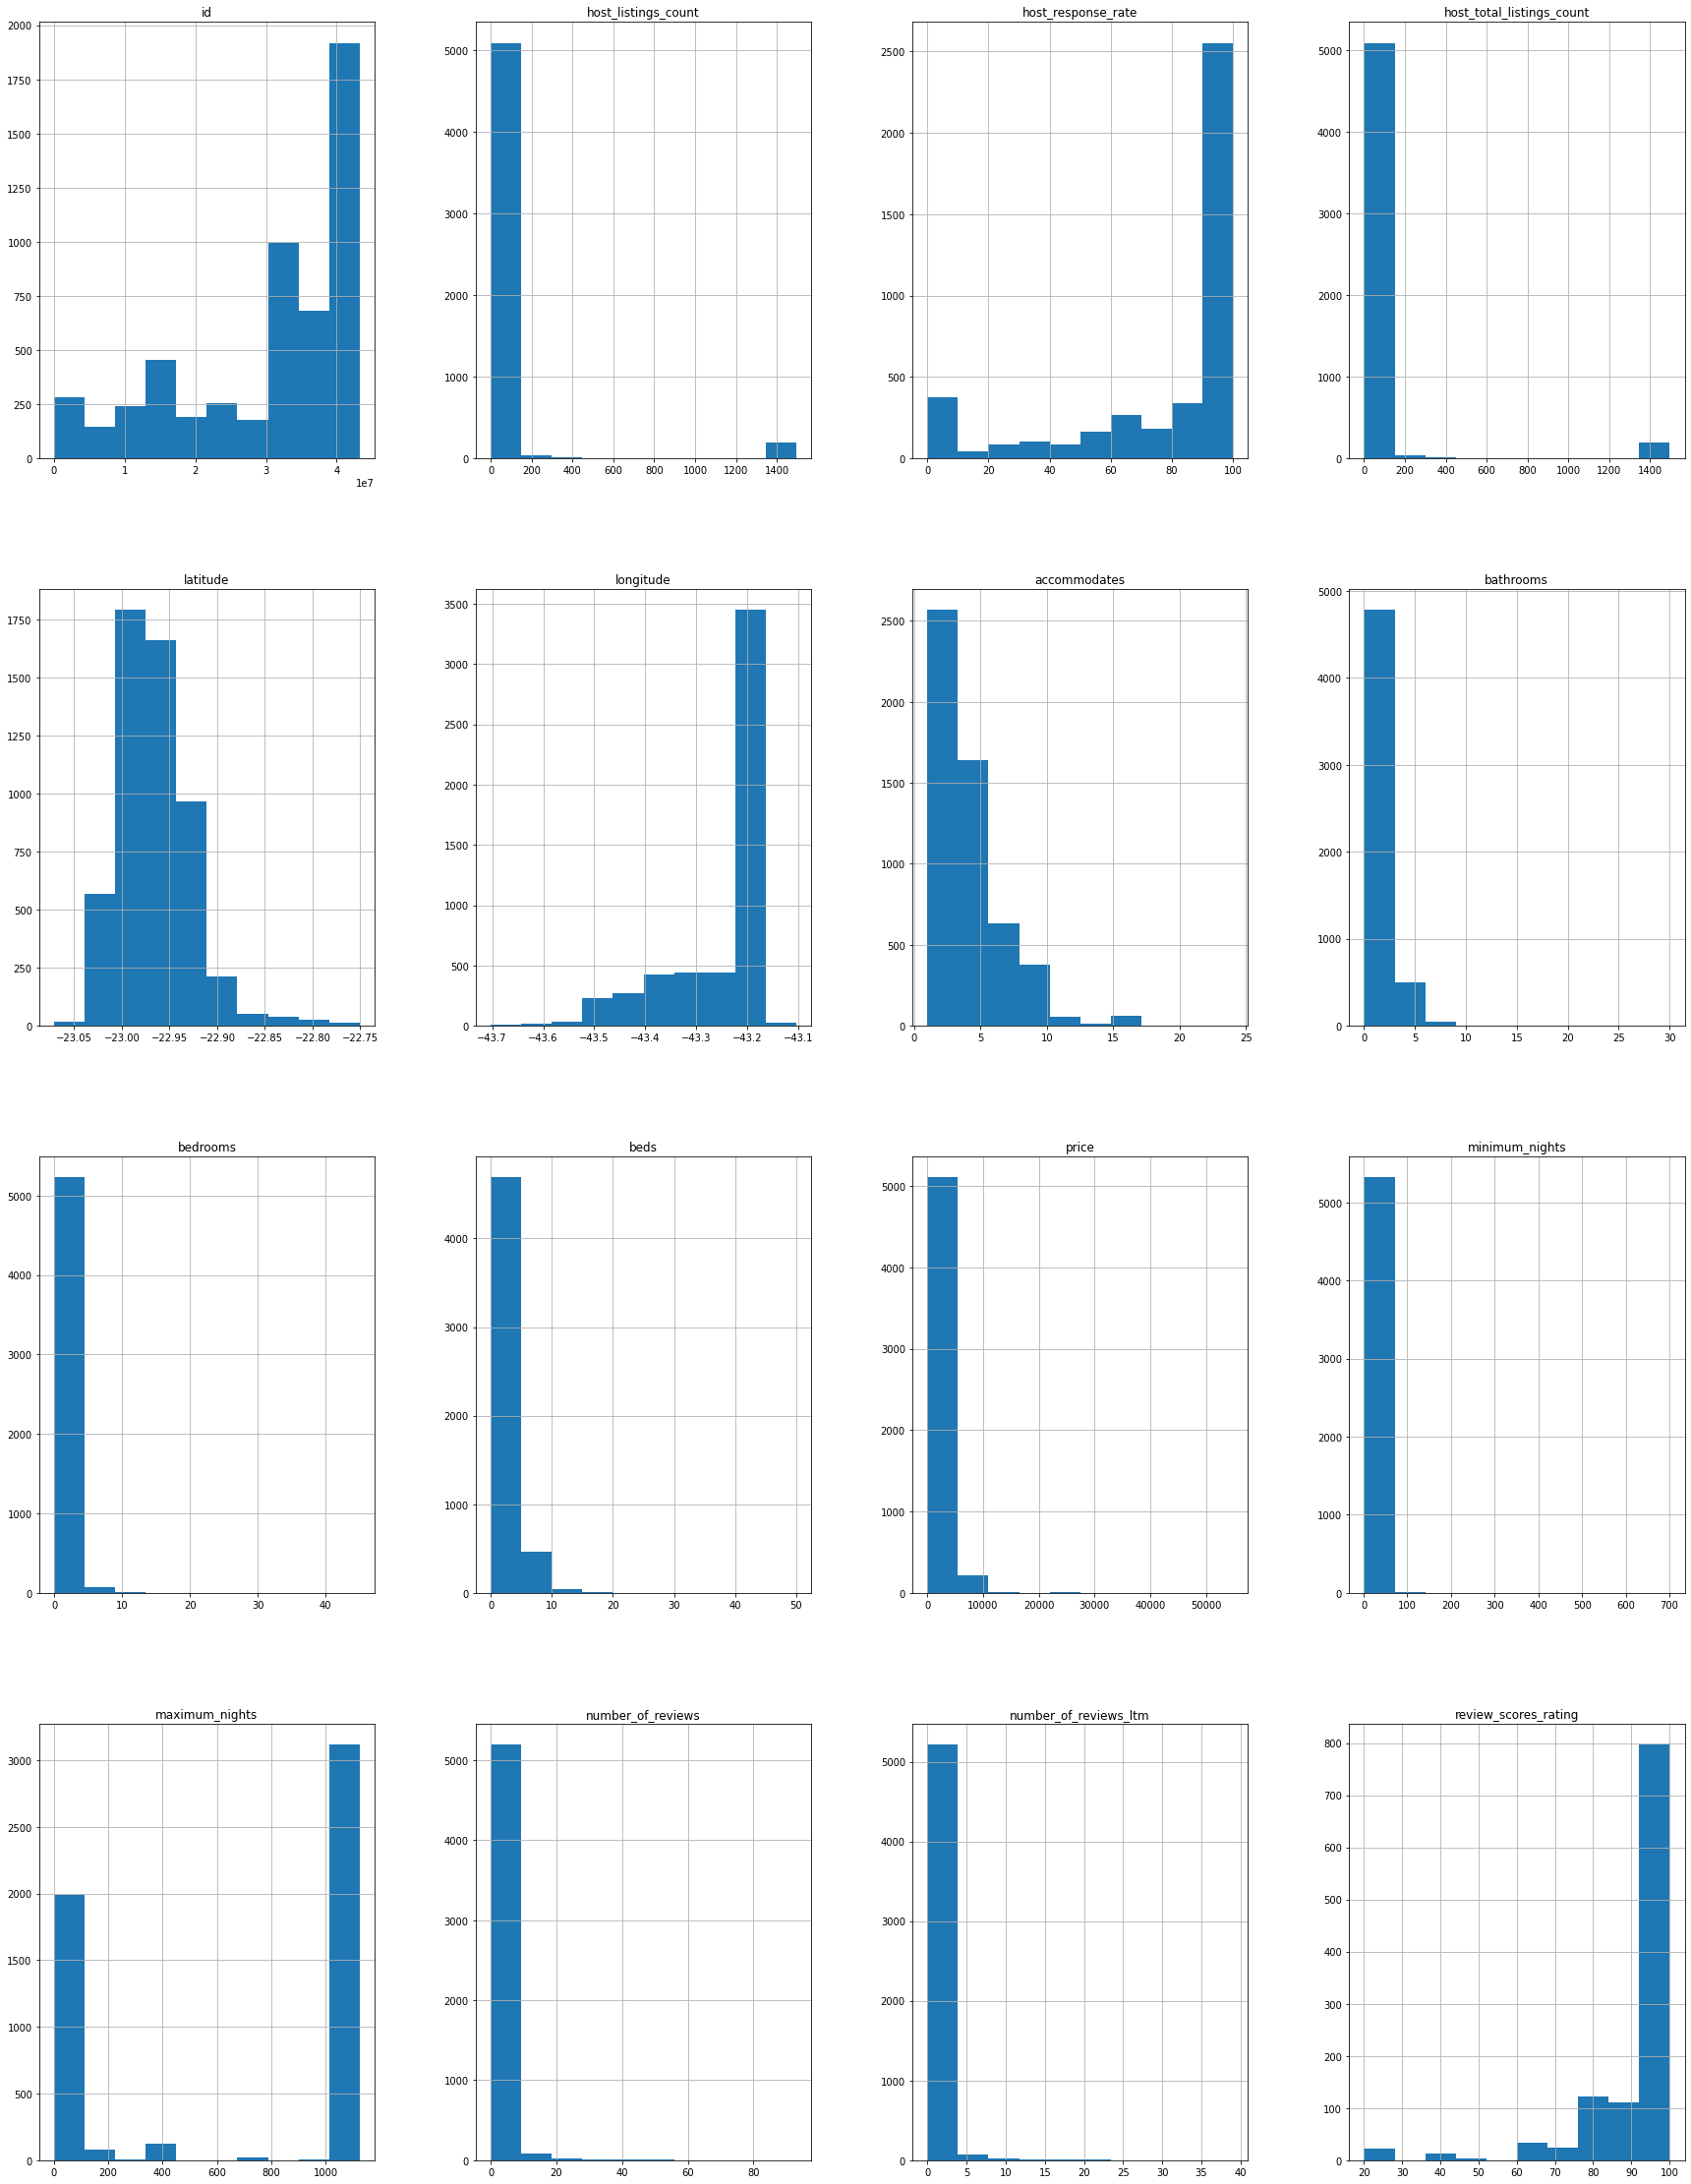

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (30,40))
ax = fig.gca()
df.hist(ax = ax)

#Correlation HeatMap

This will allow us to get a good idea of attributes strongly and weakly correlated, thus giving us an idea about what analysis to perform

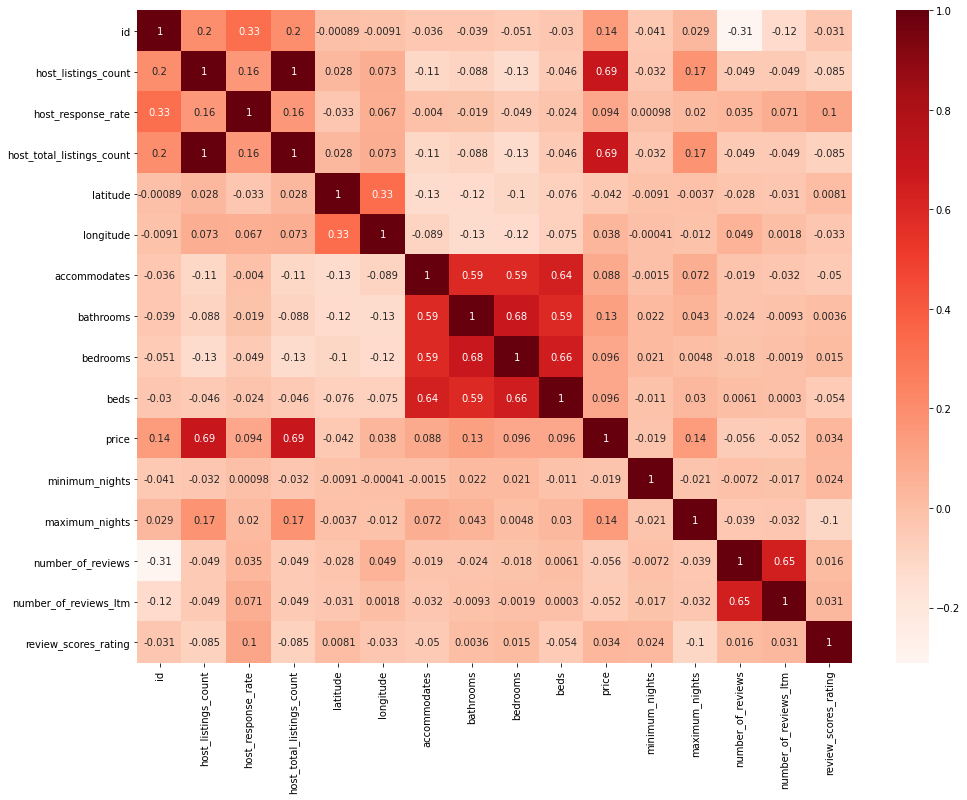

In [ ]:
plt.figure(figsize=(16,12))
_=sns.heatmap(df.corr(),cmap ='Reds', annot = True)

# NOTE:
We see that host-listings having a negative correlation with price,
already indicating that people with lesser listings charge more than people with higher listings.

# Dealing with outliers
To better deal with outliers than simply remove it by intuition, we'll use the descriptive statistic method interquartile range.
First, define a function to get the max_fence_value, which is defined as the highest value a variable can have so that it is not considered an outlier.

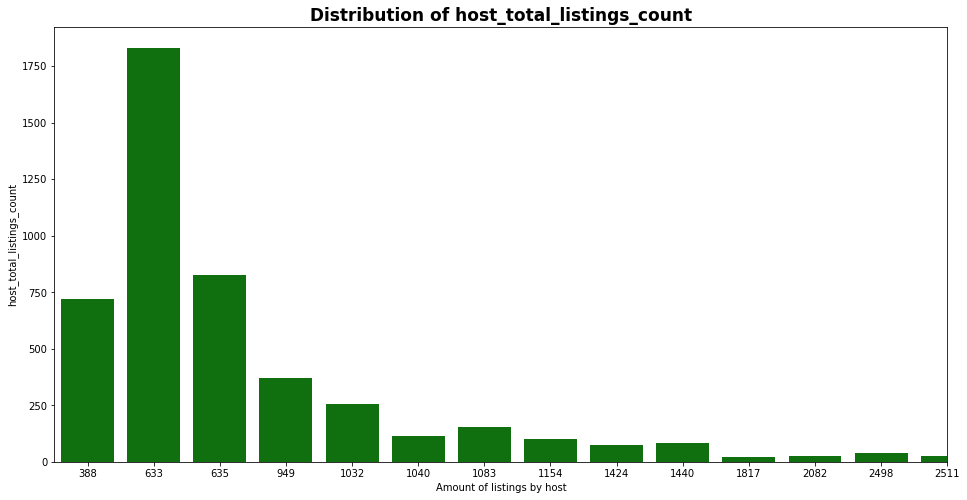

In [ ]:
def get_max_fence(column):
    qt = df[column].quantile([0.25,0.75])
    upper = qt.values[1]
    iqr = upper-qt.values[0]
    max_fence = upper + 1.5*(iqr)
    return max_fence

#function to visualise the interquartile range
def box_plot(column):
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(16,6)
    _ = sns.boxplot(x=df[column], ax = ax1)
    ax1.set_title(f'{column} boxplot')
    ax2.set_title(f'Zooming in the {column} boxplot')
    ax2.set_xlim((-0.1,1.1*get_max_fence(column)))
    _ = sns.boxplot(x=df[column], ax = ax2)

#Distribution of Host Listing Count
column = 'host_total_listings_count'
plt.figure(figsize=(16,8))
ax = sns.barplot(x=df[column].value_counts().index, y=df[column].value_counts(), color='g')
ax.set_xticklabels(map(int,df['beds'].index))
ax.set_xlim((-0.5,get_max_fence(column)+2))
ax.set_xlabel('Amount of listings by host')
_ = ax.set_title('Distribution of host_total_listings_count',fontweight="bold",fontsize="17")

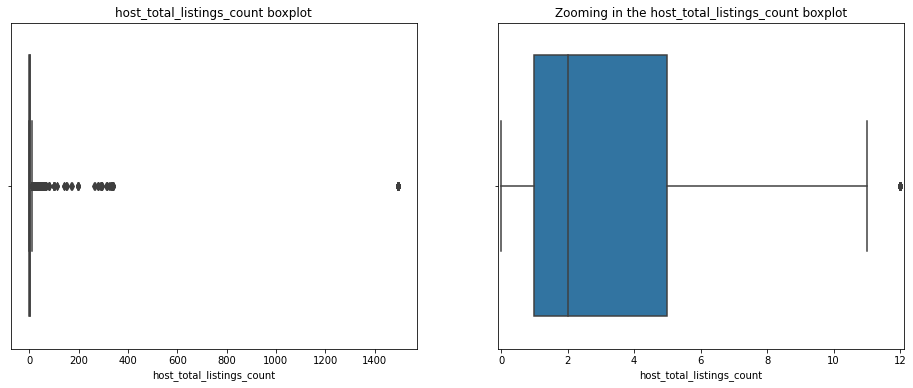

In [ ]:
box_plot(column)

In [ ]:
print(get_max_fence(column))
rows_before =df.shape[0]
df = df[df['host_total_listings_count'] <= get_max_fence('host_total_listings_count')]
print(f'{rows_before-df.shape[0]} rows were deleted.')

11.0
764 rows were deleted.


This boxplot also shows us that there is some zero values. These values will be changed to 1, since if the hosts didn't have any listing, they wouldn't be on the dataset in the first place.

In [ ]:
df.loc[df['host_total_listings_count'] == 0.0, 'host_total_listings_count'] = 1.0

#  Analysing Price

822.5

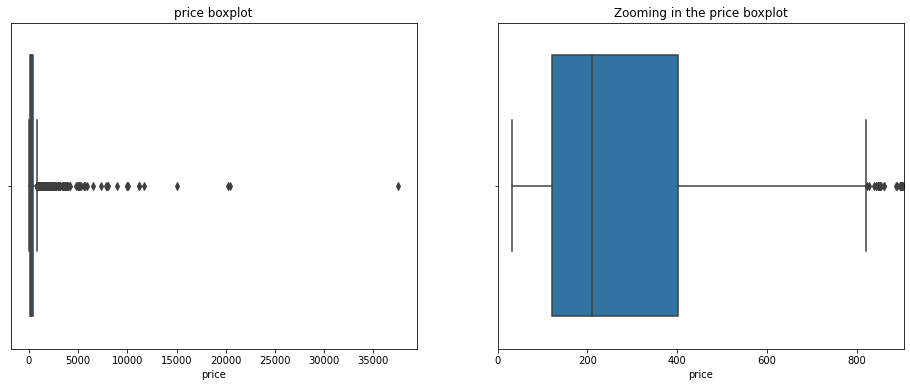

In [ ]:
box_plot('price')
get_max_fence('price')

418 rows were removed


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



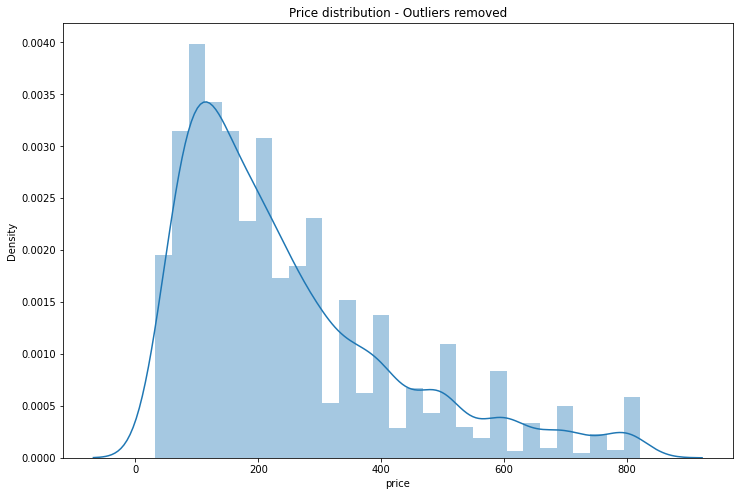

In [ ]:
rows_before = df.shape[0]
df = df[df['price'] <= get_max_fence('price')]
print(f'{rows_before-df.shape[0]} rows were removed')

plt.figure(figsize=(12,8))
ax = sns.distplot(df['price'],norm_hist=True)
_ = ax.set_title('Price distribution - Outliers removed')


Some listings contains a price with value zero, which is, clearly, a mistake. This values are dropped from the dataset since there are few of them.

In [ ]:
df.loc[df['price'] <= 0, 'price']
df.drop(df.loc[df['price'] <= 0].index, axis = 0, inplace = True)

Since price is not well distributed, a binning technique will be applied in order to better analyze data. The values below were in order to keep similar distributions between classes:

0: [0, 100]
1: (100,150]
2: (150, 200]
3: (200, 250]
4: (250, 300]
5: (300, 400]
6: (400, 600]
7: (600, 1000]
8: (1000, 100000]

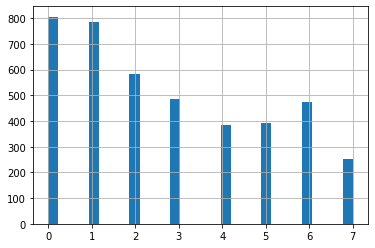

In [ ]:
bins_price = [0, 100, 150, 200, 250, 300, 400, 600, 1000, 100000]
price_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8]

df['price_bins'] = pd.cut(df['price'], bins_price, labels = price_labels, include_lowest = True)
df['price_bins'] = df['price_bins'].astype(int)
df['price_bins'].hist(bins = 30);



# Price VS Location
Analyzing different values for host_neighbourhood

In [ ]:
len(df['neighbourhood_cleansed'].value_counts())

127


In order to analyze price for different neibourhoods, the column price_bins was used instead of the price column, since its well distributed between each class, therefore the mean will be less sensitive to outliers.

In [ ]:
df.groupby('neighbourhood_cleansed').agg({'price_bins': 'mean'}).sort_values(by = 'price_bins')

,price_bins
neighbourhood_cleansed,
Magalhães Bastos,0.0
Cidade de Deus,0.0
Coelho Neto,0.0
Vila da Penha,0.0
Vigário Geral,0.0
...,...
Ribeira,5.0
Maria da Graça,5.0
Penha Circular,5.0


In [ ]:
import plotly.express as px
px.set_mapbox_access_token('pk.eyJ1IjoiaGFyc2h1YmgiLCJhIjoiY2toMDZ3ODRxMHY1ZDJxbnZqdmJjeTExYSJ9.8ucXhwpGCNvvDWrN2yj9yw')
fig = px.scatter_mapbox(df, lat='latitude', lon='longitude', color='price_bins', size_max=20, zoom=9)
fig.show()

## The information we get from this graph is that the region of Rio de Janiero has more expensive rooms.

# Hypothesis Tests

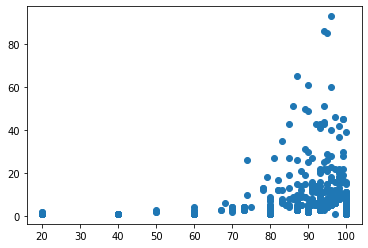

In [ ]:
plt.scatter(df["review_scores_rating"],df["number_of_reviews"])
#NULL HYPOTHESIS: CO-EFFICENT OF REGRESSION IS 0
#ALTERNATE: != 0
#TWO-TAILED TEST AS !=

Here we see that these two attributes are left-skewed T distributions

In [ ]:
from scipy.stats import ttest_ind
host=df.dropna()["review_scores_rating"]
print("review_scores_rating mean value:",df.review_scores_rating.mean())
print("review_scores_rating S.D value:",df.review_scores_rating.std())
sco=df.dropna()['number_of_reviews']
print("number_of_reviews mean value:",df.number_of_reviews.mean())
print("number_of_reviews S.D value:",df.number_of_reviews.std())
ttest ,pval = ttest_ind(host,sco)

print("p-value",float(pval))
if pval <0.05:   # alpha value is 0.05 or 5%
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

review_scores_rating mean value: 92.06193806193806
review_scores_rating S.D value: 15.162326992917682
number_of_reviews mean value: 1.2923076923076924
number_of_reviews S.D value: 4.962629128673096
p-value 0.0
we reject null hypothesis


Price & host listing count:
**h0:no relation between price and host listing count.**
**h1:there is a relation between price and host listing count.**

In [ ]:

host=df.dropna()['price']
print("price mean value:",df.price.mean())
print("price S.D value:",df.price.std())
sco=df.dropna()['host_total_listings_count']
print("host_listings_count mean value:",df.host_total_listings_count.mean())
print("host_listings_count S.D value:",df.host_total_listings_count.std())
ttest ,pval = ttest_ind(host,sco)

print("p-value",float(pval))
if pval <0.05:   # alpha value is 0.05 or 5%
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

price mean value: 247.49591346153846
price S.D value: 177.26775148866642
host_listings_count mean value: 2.262980769230769
host_listings_count S.D value: 2.073910751192055
p-value 3.662365105105995e-250
we reject null hypothesis


Price & number of beds:
**h0:no relation between price and beds.**
**h1:there is a relation between price and beds.**


In [ ]:

host=df.dropna()['price']
print("price mean value:",df.price.mean())
print("price S.D value:",df.price.std())
sco=df.dropna()['beds']
print("beds mean value:",df.beds.mean())
print("beds S.D value:",df.beds.std())
ttest ,pval = ttest_ind(host,sco)

print("pval ",pval)
if pval <0.05:   # alpha value is 0.05 or 5%
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

price mean value: 247.49591346153846
price S.D value: 177.26775148866642
beds mean value: 2.181571146245059
beds S.D value: 1.9541030441277467
pval  1.63881330187653e-250
we reject null hypothesis


Beds & accommodates:
**h0:no relation between accommodates and beds.**
**h1:there is a relation between accommodates and beds.**

In [ ]:
host=df.dropna()["beds"]
print("beds mean value:",df.price.mean())
print("beds S.D value:",df.price.std())
sco=df.dropna()['accommodates']
print("accommodates mean value:",df.accommodates.mean())
print("accommodates S.D value:",df.accommodates.std())
ttest ,pval = ttest_ind(host,sco)

print("p-value",float(pval))
if pval <0.05:   # alpha value is 0.05 or 5%
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

beds mean value: 247.49591346153846
beds S.D value: 177.26775148866642
accommodates mean value: 3.568028846153846
accommodates S.D value: 2.1112795369467583
p-value 3.666232149234585e-24
we reject null hypothesis


Bedrooms & Bathrooms:
**h0:no relation between Bedrooms and Bathrooms.**
**h1:there is a relation between Bedrooms and Bathrooms.**

In [ ]:
host=df.dropna()["bedrooms"]
print("bedrooms mean value:",df.bedrooms.mean())
print("bedrooms S.D value:",df.bedrooms.std())
sco=df.dropna()['bathrooms']
print("bathrooms mean value:",df.bathrooms.mean())
print("bathrooms S.D value:",df.bathrooms.std())
ztest ,pval1 = stests.ztest(host, x2=sco, value=0,alternative='two-sided')

print("p-value",float(pval))
if pval <0.05:   # alpha value is 0.05 or 5%
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

bedrooms mean value: 1.365328820116054
bedrooms S.D value: 1.1513084037657122
bathrooms mean value: 1.4477611940298507
bathrooms S.D value: 0.9459462956204555
p-value 3.666232149234585e-24
we reject null hypothesis


# K-Means Clustering of GPS Locations

In [ ]:
from sklearn.cluster import KMeans
import csv
# Variable with the Longitude and Latitude

X=df.loc[:,['id','latitude','longitude']]
X.head(10)

,id,latitude,longitude
388,454439,-23.00096,-43.30893
633,762985,-22.98532,-43.22462
635,764534,-22.96760,-43.18378
949,925561,-22.98355,-43.19550
1040,995707,-22.94319,-43.19098
1424,1607061,-22.96469,-43.17576
1440,1622701,-22.93723,-43.18936
1817,2033743,-22.95879,-43.20456
2082,2210667,-22.98500,-43.19304
2498,2373705,-22.93636,-43.18867


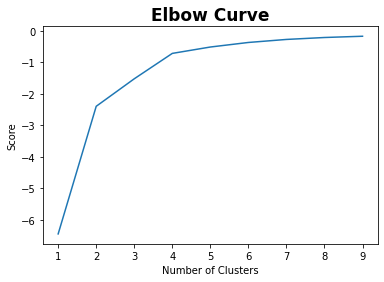

In [ ]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['latitude']]
X_axis = df[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve',fontsize="17",fontweight="bold")
plt.show()

### The plot shows that the optimal number of clusters is 4

In [ ]:
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) #z Labels of each point
X.head(10)

,id,latitude,longitude,cluster_label
388,454439,-23.00096,-43.30893,0
633,762985,-22.98532,-43.22462,3
635,764534,-22.96760,-43.18378,3
949,925561,-22.98355,-43.19550,3
1040,995707,-22.94319,-43.19098,3
1424,1607061,-22.96469,-43.17576,3
1440,1622701,-22.93723,-43.18936,1
1817,2033743,-22.95879,-43.20456,3
2082,2210667,-22.98500,-43.19304,3
2498,2373705,-22.93636,-43.18867,1


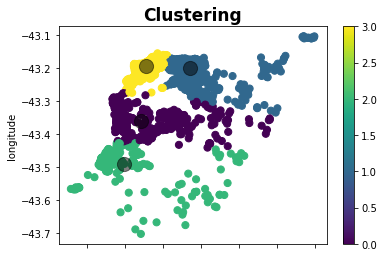

In [ ]:
X.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Clustering',fontsize="17",fontweight="bold")
plt.show()




# Distribution of Property Types


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



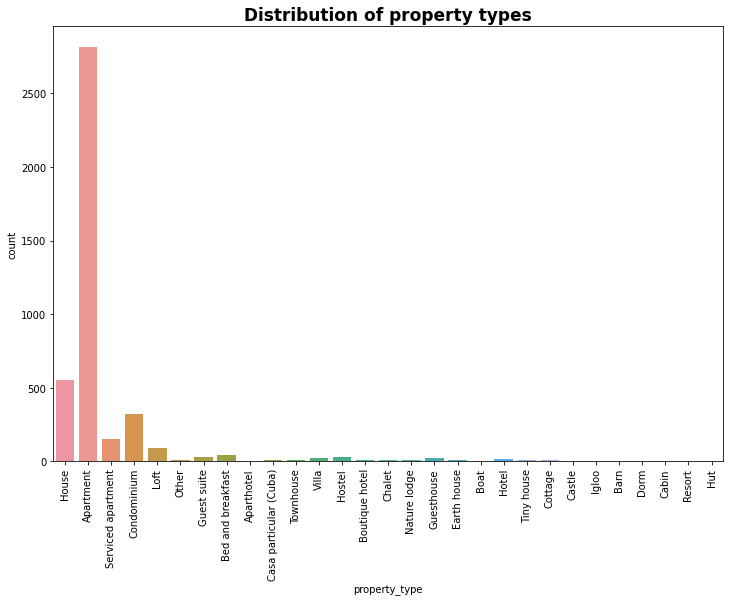

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot('property_type', data=df)
ax.tick_params(axis='x', rotation=90)
_ = ax.set_title('Distribution of property types',fontsize="17",fontweight="bold")
plt.show()

In [ ]:
categories_to_append = ('Aparthotel', 'Earth house', 'Chalet', 'Cottage', 'Tiny house',
                        'Boutique hotel', 'Hotel', 'Casa particular (Cuba)', 'Bungalow',
                        'Nature lodge', 'Cabin', 'Castle', 'Treehouse', 'Island', 'Boat', 'Tent',
                        'Resort', 'Hut', 'Campsite', 'Barn', 'Dorm', 'Camper/RV', 'Farm stay', 'Yurt',
                        'Tipi', 'Pension (South Korea)', 'Dome house', 'Igloo', 'Casa particular',
                        'Houseboat', 'Lighthouse', 'Plane', 'Train', 'Parking Space')

for cat in categories_to_append:
    df.loc[df['property_type'] == cat, 'property_type'] = 'Other'

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



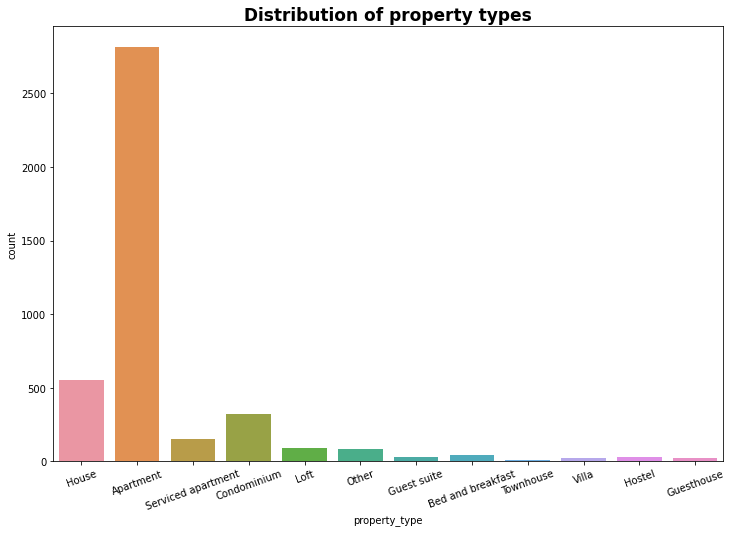

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot('property_type', data=df)
ax.tick_params(axis='x', rotation=20)
_ = ax.set_title('Distribution of property types',fontsize="17",fontweight="bold")
plt.show()

# Cleaning up Cities

In [ ]:
df["city"] = df["city"].replace(['Rio de Janeiro', 'Rio', 'rio de janeiro ','RIO DE JANEIRO','Rio de Janeiro ','Rio de janeiro','Rio de janeiro ','Estrada do Rio Morto, 500, Vargem Grande, Rio de Janeiro ','Río de Janeiro', 'Rio De Janeiro','Cidade Universitária da Universidade Federal do Rio de Janeiro','rio de janeiro','Rio de Janeiro-RJ','R','Centro / Lapa - Rio de Janeiro','Rio de Janeiro, Alto Leblon','Rio de Janeiro, Rio de Janeiro, BR','Recreio dos Bandeirantes / Rio de Janeiro','Rio de Janeiro, Rio de Janeiro, ','Rj','Río de Janeiro '],'Rio de Janeiro')
df['city']=df['city'].replace(['Santa Tereza'],'Santa Teresa')
df['city']=df['city'].replace(['Río de Janeiro Copacabana ','Copacabana / RJ','Copacabana - Rio de Janeiro','Copacabana Rio de Janeiro ','Copacabana '],'Copacabana')
df['city']=df['city'].replace(['Caldas Novas '],'Caldas Novas')
df['city']=df['city'].replace(['Gambôa'],'Gamboa')
df['city']=df['city'].replace(['Jacarepaguá ','Freguesia (Jacarepaguá)'],'Jacarepaguá')

In [ ]:
rio=['Portuguesa','Maré','Engenho da Rainha','Itanhangá','Lagoa','Cosme Velho','São Cristóvão','Gávea','Catete','Rio de Janeiro','Barra da Tijuca','Leblon','Urca','Recreio dos Bandeirantes','Centro','São Conrado','Flamengo','Bangu','Meier','Curicica','Pavuna',
     'Quintino Bocaiuva','Tijuca','Guaratiba','Engenho Novo','Joá','Paciência','Jacarepagua','Vila Isabel','Jacarepaguá',
     'Realengo','Padre Miguel','Bento Ribeiro','Gamboa','Barra de Guaratiba','Barra da Tijuca ','Alto da Boa Vista',
     'Todos os Santos','Barra de Guaratiba ','Irajá','Praca da Bandeira','Freguesia de Jacarepaguá','Caju','Parque Sao Nicolau',
     'Cosmos','Maracanã','Parque Analândia','Madureira','Sampaio','Estácio','Olaria','Vargem Pequena','Maria da Graça','Anil',
     'Abolição','Gardênia Azul','Camorim','Rio Comprido','Sepetiba','Praça Seca','Vila Militar','Vidigal','Rocha','Ramos',
     'Vista Alegre','Vila Cosmos','São Francisco Xavier','Engenho de Dentro','Vigário Geral','Moneró','Vicente de Carvalho',
     'Copacabana','Rocinha','Cidade Nova','Penha Circular','Catumbi','Cidade Industrial','Ilha das Cobras','Pechincha',
     'Recreio Bandeirante','Del Castilho','Jardim Excelcior','Coelho Neto','Galeão','Armação dos Búzios','Jardim America','Vila Valqueire','Cachambi','Manguinhos','Bancários',
     'Nilópolis','Recreio dos Bandeir','R. Bandeirantes','Ilha do Governador','Benfica','Cabo Frio','Magalhães Bastos',
     'Itaipava','Marechal Hermes','Lins de Vasconcelos','Grumari','Engenheiro Leal','Bom jardim','Pedra de Guaratiba']
sao_paulo=['Sao Paulo','Jardim Botânico','Botafogo','Leme','Jardim Esperança','Ribeira','Oswaldo Cruz','Piedade','Água Santa','Higienópolis','Riachuelo','Jacaré','Tanque','Jandira']
ceara=['Praia de Jericoacoara','Ceará','Tauá']
de_sul=['Rio Grande do Sul','Taquara ','Encantado','Santo Cristo','Pr Ferradura','Taquara']
maranhao=['Jardim America','Grajau','Vargem Grande']
goias=['Vila Canaa','Jardim Guanabara','Caldas Novas']
bahia=['Saúde','Andarai','Jd Botanico','Andaraí']
Espirito=['E','Laranjeiras','Glória','Santa Teresa']
catarina=['Penha','R dos Bandeirantes','Paquetá']
minas_gerais=['Recreio','Ipanema']
doNorte=['Santa Cruz']
Amazonas=['Humaitá','Praia de Jericoacoara ']
matoSul=['Campo Grande']
pernambuco=['Barros Filho']

In [ ]:
def f(row):
  val=[]
  if row['city'] in rio:
      val = 'Rio de Janeiro'
  elif row['city'] in sao_paulo:
      val = 'Sao Paulo'
  elif row['city'] in ceara:
      val = 'Ceará'
  elif row['city'] in de_sul:
      val = 'Rio Grande do Sul'
  elif row['city'] in maranhao:
      val = 'Maranhão'
  elif row['city'] in goias:
      val = 'Goiás'
  elif row['city'] in bahia:
      val = 'Bahia'
  elif row['city'] in Espirito:
      val = 'Espírito Santo'
  elif row['city'] in catarina:
      val = 'Santa Catarina'
  elif row['city'] in minas_gerais:
      val = 'Minas Gerais'
  elif row['city'] in doNorte:
      val = 'Rio Grande do Norte'
  elif row['city'] in Amazonas:
      val = 'Amazonas'
  elif row['city'] in matoSul:
      val = 'Mato Grosso do Sul'
  elif row['city'] in pernambuco:
      val = 'Pernambuco'
  else:
    print(row['city'])
  return val

In [ ]:
df['State'] = df.apply(f, axis=1)
#df.head()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



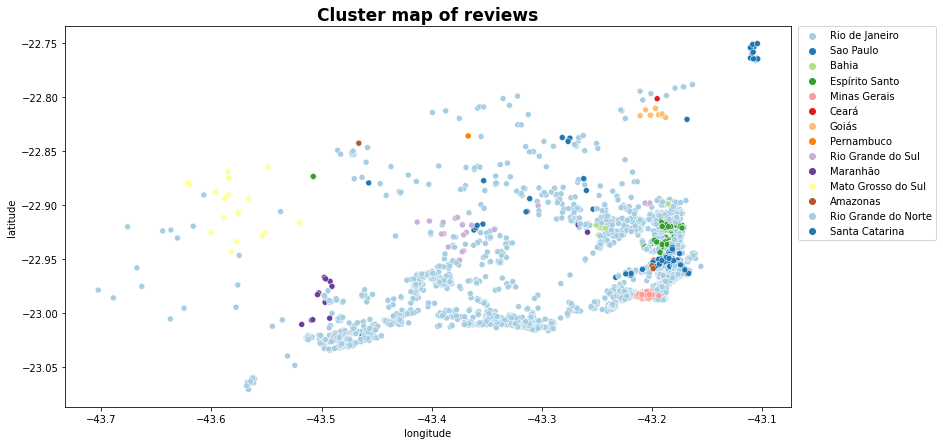

In [ ]:
plt.figure(figsize=(13,7))
plt.title("Cluster map of reviews",fontsize="17",fontweight="bold")
sns.scatterplot(df.longitude,df.latitude,hue=df.State, palette='Paired')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.ioff()
plt.show()

### The pie chart above shows that most of the Airbnb listings are most in Rio de Janeiro. The highest listings for Airbnb come from the state of Rio de Janeiro.

In [ ]:
import plotly
import plotly.express as px

fig=px.pie(df,values=df.State.value_counts(),names=df.State.unique())
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



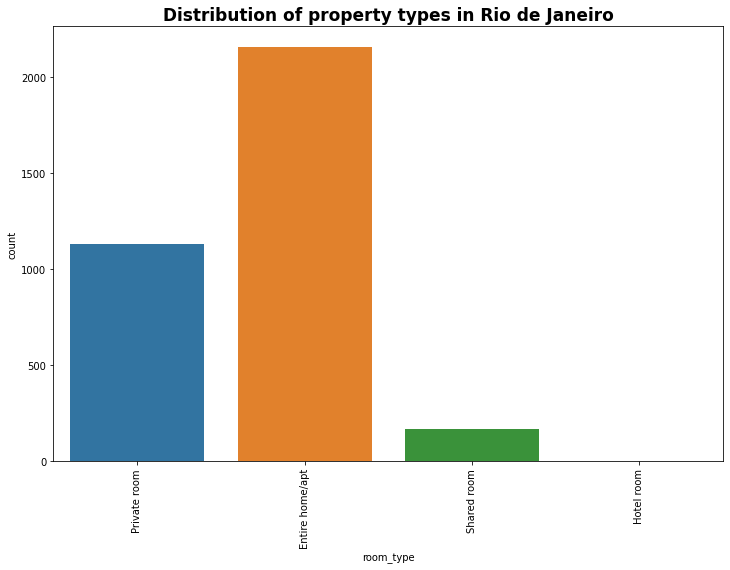

In [ ]:
rio_df=df[df['State']=='Rio de Janeiro']
rio_df = rio_df[['State','room_type']].copy()
plt.figure(figsize=(12,8))
ax = sns.countplot('room_type', data=rio_df)
ax.tick_params(axis='x', rotation=90)
_ = ax.set_title('Distribution of property types in Rio de Janeiro',fontsize="17",fontweight="bold")

### This graph shows that the most popular airbnb room type in Rio de Janeiro are of the type Entire home/apt and next most popular are the private rooms where as hotel rooms are the least popular.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



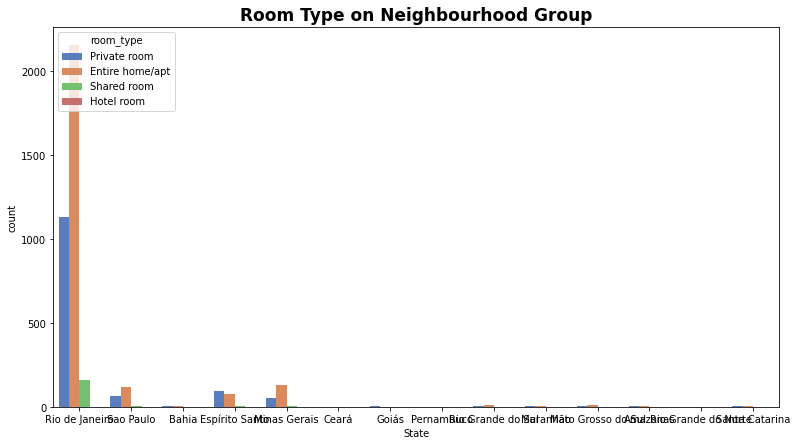

In [ ]:
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group",fontsize="17",fontweight="bold")
sns.countplot(df.State,hue=df.room_type, palette="muted")
plt.show()